In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib
# matplotlib.use('qt5agg')
import matplotlib.pyplot as plt
import time
import numpy as np
import query_db
import composite

# Median Comparison

In [3]:
query_max = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -1 and phase <= 1"]

In [4]:
comps_max, sn_arrays_max, boot_sn_arrays_max = query_db.main(len(query_max), query_max, boot='b', medmean=1, selection='max_coverage', verbose=False, gini_balance=True)
comps_max_med, sn_arrays_max_med, boot_sn_arrays_max_med = query_db.main(len(query_max), query_max, boot='b', medmean=2, selection='max_coverage', verbose=False, gini_balance=False)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -1 and phase <= 1
104 questionable files currently ignored
(4, 'questionable spectra removed', 202, 'spectra left')
(5, 'Peculiar Ias removed', 197, 'spectra left')
159 valid spectra found
Arrays cleaned
5 spectra may have telluric contamination


composite.py:1132: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if template.RMSE != None:
composite.py:1169: RuntimeWarning: divide by zero encountered in divide
  error = 1./np.sqrt(template.ivar)


105 total SNe
102 SNs with host corrections


composite.py:445: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  guess = np.average(template.flux[template.x1:template.x2])/np.average(uSN.flux[uSN.x1:uSN.x2])
gini.py:43: RuntimeWarning: invalid value encountered in absolute
  g_diff = np.absolute(g_wi - g_wj)


Gini balancing...
Balanced after 28 iterations
Original: 8101.38909492
Bootstrapping


composite.py:506: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  res = temp_flux[pos1:pos2] - comp.flux[pos1:pos2]


scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -1 and phase <= 1
104 questionable files currently ignored
(4, 'questionable spectra removed', 202, 'spectra left')
(5, 'Peculiar Ias removed', 197, 'spectra left')
159 valid spectra found
Arrays cleaned
5 spectra may have telluric contamination
105 total SNe
102 SNs with host corrections
Original: 281905.348695
Bootstrapping
scaling boots...
computing confidence intervals...


Phase:  0.146994281959
dm15:  1.18086115942
Redshift:  0.014874244809
Phase:  0.094053191742
dm15:  1.1072484606
Redshift:  0.0162430206002


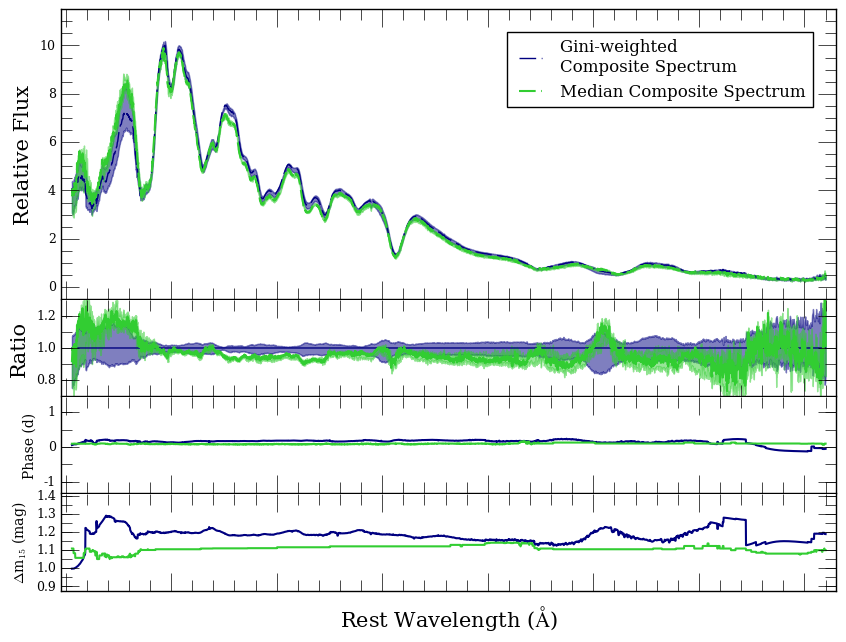

In [19]:
comparisons = []
comparisons.append(comps_max[0])
comparisons.append(comps_max_med[0])
comparisons[0].name = "Comp"
comparisons[1].name = "Comp2"
# query_db.scaled_plot([comparisons[0], comparisons[1]], zoom=False, dashes = [12,4], min_num_show = 12,
#                      legend_labels = ["Gini-weighted \nComposite Spectrum", "Median Composite Spectrum"], 
#                      savename = 'main_composites_updated/med_comparison_large')
query_db.scaled_plot([comparisons[0], comparisons[1]], zoom=False, dashes = [12,4], min_num_show = 12, include_phase_dm15 = True,
                     legend_labels = ["Gini-weighted \nComposite Spectrum", "Median Composite Spectrum"])

In [6]:
query_max_dm15 = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -.1 and phase <= .1"]
# query_max_dm15 = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 1 and 9 and ((dm15_source >= 1. and dm15_source < 1.5) or (dm15_from_fits >= 1. and dm15_from_fits < 1.5))"]
# query_max_dm15 = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -6 and phase <= 0 and NED_host between 1 and 9 and ((dm15_source >= 1. and dm15_source < 1.4) or (dm15_from_fits >= 1. and dm15_from_fits < 1.4)) and Supernovae.SN != '1997bp'"]

In [7]:
comps_max_dm15, sn_arrays_max_dm15, boot_sn_arrays_max_dm15 = query_db.main(len(query_max_dm15), query_max_dm15, boot='b', medmean=1, selection='max_coverage', verbose=False, gini_balance=True)
comps_max_med_dm15, sn_arrays_max_med_dm15, boot_sn_arrays_max_med_dm15 = query_db.main(len(query_max_dm15), query_max_dm15, boot='b', medmean=2, selection='max_coverage', verbose=False, gini_balance=False)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -.1 and phase <= .1
104 questionable files currently ignored
(0, 'questionable spectra removed', 19, 'spectra left')
(1, 'Peculiar Ias removed', 18, 'spectra left')
16 valid spectra found
Arrays cleaned
2 spectra may have telluric contamination
15 total SNe
14 SNs with host corrections


gini.py:48: RuntimeWarning: invalid value encountered in double_scalars
  gini_coeffs.append(gini_num/gini_denom)


Gini balancing...
Balanced after 7 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -.1 and phase <= .1
104 questionable files currently ignored
(0, 'questionable spectra removed', 19, 'spectra left')
(1, 'Peculiar Ias removed', 18, 'spectra left')
16 valid spectra found
Arrays cleaned
2 spectra may have telluric contamination
15 total SNe
14 SNs with host corrections
Bootstrapping
scaling boots...
computing confidence intervals...


Phase:  0.107253410298
dm15:  1.15261033726
Redshift:  0.0132916579298
Phase:  0.0619120946619
dm15:  1.17287418155
Redshift:  0.011787082425


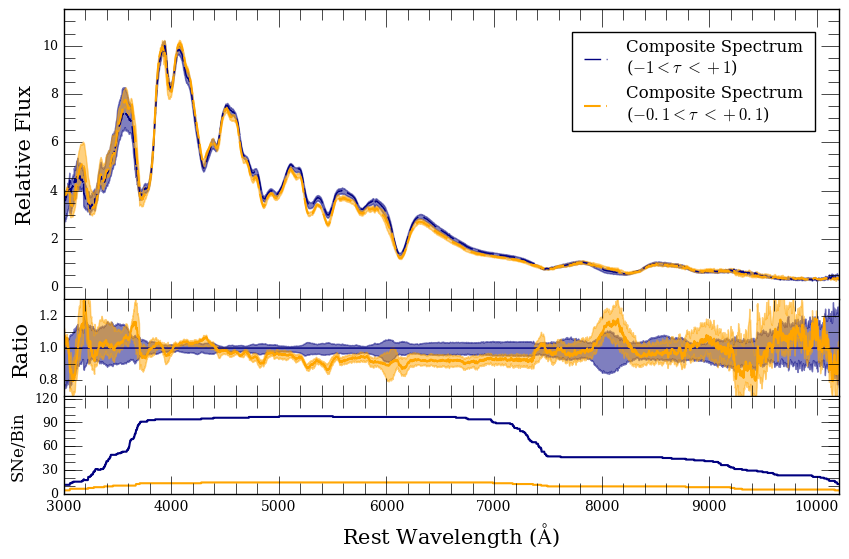

In [20]:
comparisons = []
comparisons.append(comps_max[0])
comparisons.append(comps_max_dm15[0])
comparisons[0].name = "Comp"
comparisons[1].name = "Comp3"
# query_db.scaled_plot([comparisons[0], comparisons[1]], zoom=False, dashes = [12,4], include_spec_bin = True, xlim = [3000,10200],
#                      legend_labels = ["Gini-weighted \nComposite Spectrum (N = 99)", "Gini-weighted \nComposite Spectrum (N = 15)"],
#                      savename='main_composites_updated/sample_size_comparison')
query_db.scaled_plot([comparisons[0], comparisons[1]], zoom=False, dashes = [12,4], include_spec_bin = True, xlim = [3000,10200],
                     legend_labels = ["Composite Spectrum \n"+r"($-1 < \tau\ < +1$)", "Composite Spectrum \n"+r"($-0.1 < \tau\ < +0.1$)"])

# Gini Comparison

In [9]:
gini_query = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 28 and phase < 32"]

In [10]:
comps_max, sn_arrays_max, boot_sn_arrays_max = query_db.main(len(gini_query), gini_query, boot='nb', medmean=1, selection='max_coverage', verbose=False, gini_balance=False)
comps_max_med, sn_arrays_max_med, boot_sn_arrays_max_med = query_db.main(len(gini_query), gini_query, boot='nb', medmean=2, selection='max_coverage', verbose=False, gini_balance=False)
comps_max_gini, sn_arrays_max_gini, boot_sn_arrays_max_gini = query_db.main(len(gini_query), gini_query, boot='nb', medmean=1, selection='max_coverage', verbose=False, gini_balance=True)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 28 and phase < 32
ERROR:  2002bo_20020421_0_2_00.dat None
173 questionable files currently ignored
(9, 'questionable spectra removed', 145, 'spectra left')
(4, 'Peculiar Ias removed', 141, 'spectra left')
120 spectra with host corrections
173 questionable files currently ignored
87 valid SNe found
Arrays cleaned
4 spectra may have telluric contamination
87 SNs with host corrections
Creating composite...
Done.
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 28 and phase < 32
ERROR:  2002bo_20020421_0_2_00.dat None
173 questionable files currently ignored
(9, 'questionable spectra removed', 145, 'spectra left')
(4, 'Peculiar Ias removed', 141, 'spectra left')
120 spectra with host corrections
173 questionable files currently ignored
87 valid SNe found
Arrays cleaned
4 spectra may have telluric contamination
87 SNs with host correc

2001el


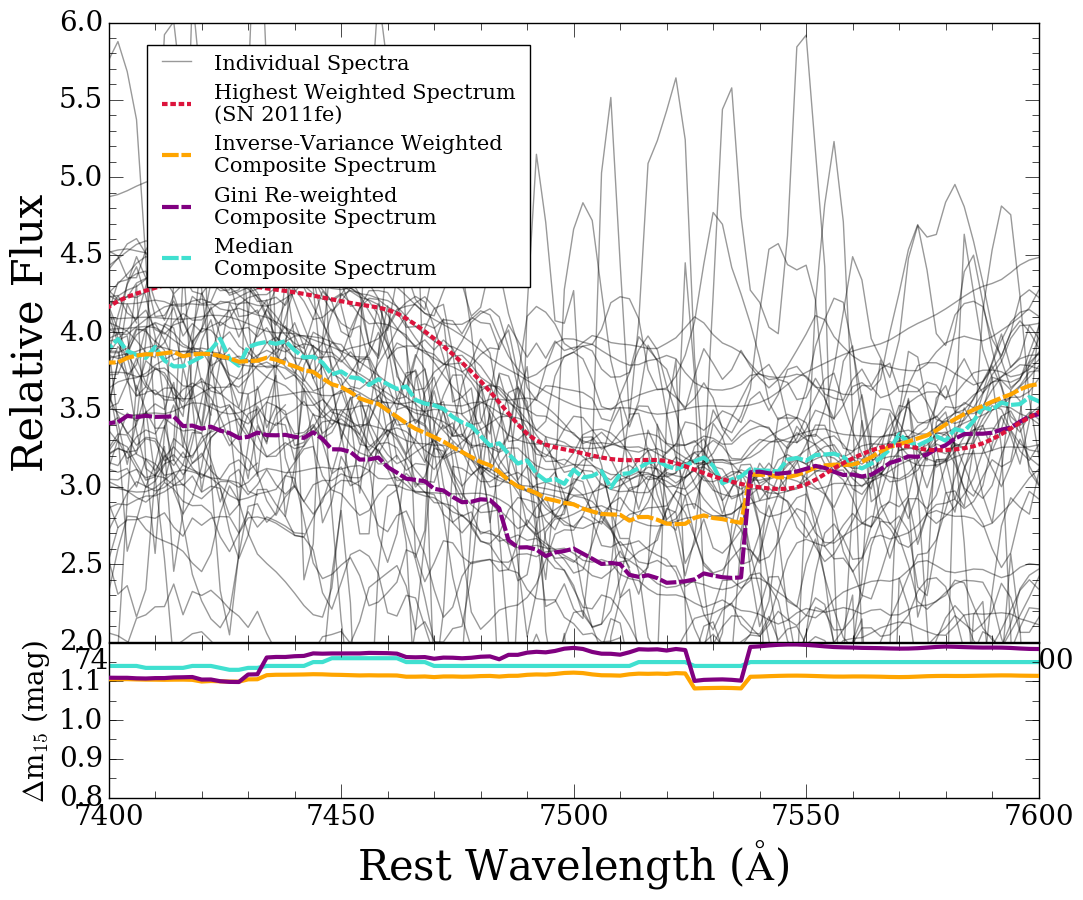

In [15]:
comparisons = []
comparisons.append(comps_max[0])
comparisons.append(comps_max_med[0])
comparisons.append(comps_max_gini[0])
comparisons[0].name = "Comp"
comparisons[1].name = "Comp2"
comparisons[2].name = "Comp3"
query_db.plot_comp_and_all_spectra(comparisons[0], sn_arrays_max[0], comp2 = comparisons[2], comp3 = comparisons[1], one_color = True, xlim = [7400,7600], ylim = [2,6], dm15=True)
# query_db.scaled_plot([comparisons[0], comparisons[1]], min_num_show=1, xlim = [2500,4000])
# query_db.plot_comp_and_all_spectra(comparisons[0], sn_arrays_max[0])

In [16]:
# gini_query_2 = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 10 and 18 and ((dm15_source >= 1.2 and dm15_source < 1.5) or (dm15_from_fits >= 1.2 and dm15_from_fits < 1.5))"]
gini_query_2 = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 0 and phase <= 6 and NED_host between 1 and 9 and ((dm15_source >= 1. and dm15_source < 1.4) or (dm15_from_fits >= 1. and dm15_from_fits < 1.4)) and Supernovae.SN != '1997bp'"]

In [17]:
comps_max2, sn_arrays_max2, boot_sn_arrays_max2 = query_db.main(len(gini_query_2), gini_query_2, boot='b', medmean=1, selection='max_coverage', verbose=False, gini_balance=False)
comps_max_gini2, sn_arrays_max_gini2, boot_sn_arrays_max_gini2 = query_db.main(len(gini_query_2), gini_query_2, boot='b', medmean=1, selection='max_coverage', verbose=False, gini_balance=True)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 0 and phase <= 6 and NED_host between 1 and 9 and ((dm15_source >= 1. and dm15_source < 1.4) or (dm15_from_fits >= 1. and dm15_from_fits < 1.4)) and Supernovae.SN != '1997bp'
173 questionable files currently ignored
Generate variance failed for:  [u'sn2005cf-20050614-hst.flm']
(4, 'questionable spectra removed', 56, 'spectra left')
(0, 'Peculiar Ias removed', 56, 'spectra left')
55 spectra with host corrections
173 questionable files currently ignored
14 valid SNe found
Arrays cleaned
1 spectra may have telluric contamination
14 SNs with host corrections
Creating composite...
Done.
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 0 and phase <= 6 and NED_host between 1 and 9 and ((dm15_source >= 1. and dm15_source < 1.4) or (dm15_from_fits >= 1. and dm15_from_fi

1996x


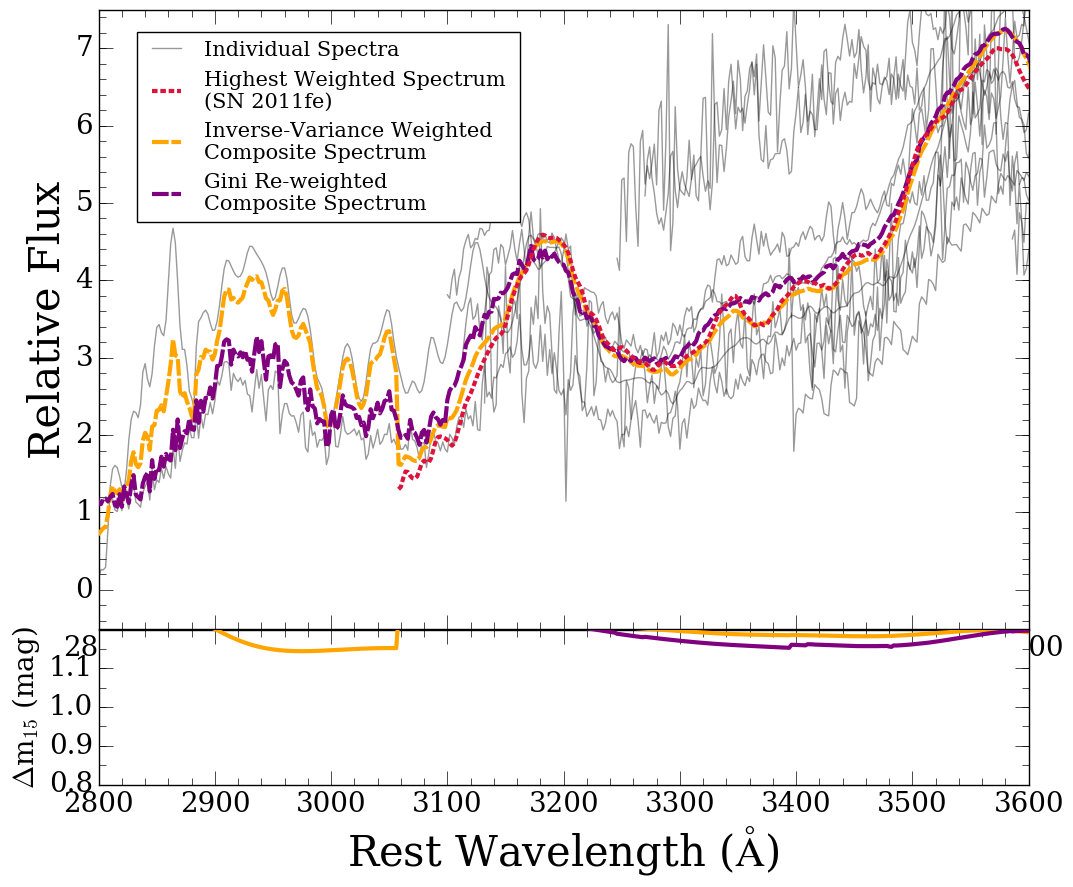

In [23]:
comparisons = []
comparisons.append(comps_max2[0])
comparisons.append(comps_max_gini2[0])
comparisons[0].name = "Comp"
comparisons[1].name = "Comp2"
query_db.plot_comp_and_all_spectra(comparisons[0], sn_arrays_max2[0], comp2 = comparisons[1], one_color = True, xlim = [2800,3600], ylim = [-.5,7.5], boots=False, dm15=True)

In [3]:
# gini_query_3 = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 2 and phase <= 3 and ((dm15_source >= .9 and dm15_source < 1.1) or (dm15_from_fits >= .9 and dm15_from_fits < 1.1))"]
gini_query_3 = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -4 and phase <= 0 and ((dm15_source >= .5 and dm15_source < 1.3) or (dm15_from_fits >= .5 and dm15_from_fits < 1.3))"]

In [4]:
comps_max3, sn_arrays_max3, boot_sn_arrays_max3 = query_db.main(len(gini_query_3), gini_query_3, boot='nb', medmean=1, verbose=False, gini_balance=False)
comps_max_med3, sn_arrays_max_med3, boot_sn_arrays_max_med3 = query_db.main(len(gini_query_3), gini_query_3, boot='nb', medmean=2, verbose=False, gini_balance=False)
comps_max_gini3, sn_arrays_max_gini3, boot_sn_arrays_max_gini3 = query_db.main(len(gini_query_3), gini_query_3, boot='nb', medmean=1, verbose=False, gini_balance=True)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -4 and phase <= 0 and ((dm15_source >= .5 and dm15_source < 1.3) or (dm15_from_fits >= .5 and dm15_from_fits < 1.3))
102 questionable files currently ignored
(13, 'questionable spectra removed', 243, 'spectra left')
(2, 'Peculiar Ias removed', 241, 'spectra left')
209 valid spectra found
Arrays cleaned
10 spectra may have telluric contamination


composite.py:1114: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if template.RMSE != None:
composite.py:1151: RuntimeWarning: divide by zero encountered in divide
  error = 1./np.sqrt(template.ivar)
composite.py:605: RuntimeWarning: invalid value encountered in sqrt
  rmse = np.sqrt(sq_diffs/template.ivar)
composite.py:1151: RuntimeWarning: invalid value encountered in sqrt
  error = 1./np.sqrt(template.ivar)
C:\Program Files\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3569: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


91 total SNe
89 SNs with host corrections
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -4 and phase <= 0 and ((dm15_source >= .5 and dm15_source < 1.3) or (dm15_from_fits >= .5 and dm15_from_fits < 1.3))
102 questionable files currently ignored
(13, 'questionable spectra removed', 243, 'spectra left')
(2, 'Peculiar Ias removed', 241, 'spectra left')
209 valid spectra found
Arrays cleaned
10 spectra may have telluric contamination
91 total SNe
89 SNs with host corrections
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -4 and phase <= 0 and ((dm15_source >= .5 and dm15_source < 1.3) or (dm15_from_fits >= .5 and dm15_from_fits < 1.3))
102 questionable files currently ignored
(13, 'questionable spectra removed', 243, 'spectra left')
(2, 'Peculiar Ias removed', 241, 'spectra left')
209 valid spectra found
Arrays cleaned
10 spectra may have telluric contamination
91 total S

gini.py:43: RuntimeWarning: invalid value encountered in absolute
  g_diff = np.absolute(g_wi - g_wj)


Gini balancing...
Balanced after 25 iterations


2011fe


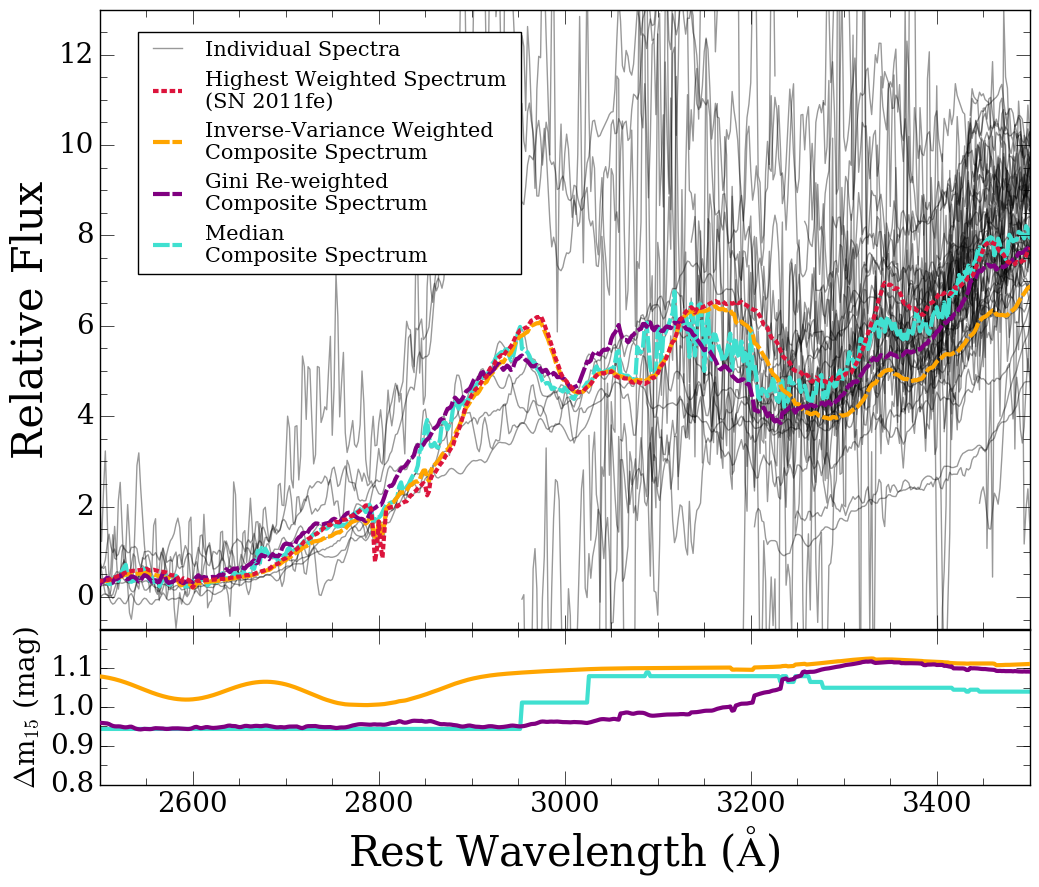

In [6]:
comparisons = []
comparisons.append(comps_max3[0])
comparisons.append(comps_max_gini3[0])
comparisons.append(comps_max_med3[0])
comparisons[0].name = "Comp"
comparisons[1].name = "Comp2"
comparisons[2].name = "Comp3"
# query_db.plot_comp_and_all_spectra(comparisons[0], sn_arrays_max3[0], comp2 = comparisons[1], comp3 = comparisons[2], one_color = True, xlim = [2500,3500], ylim = [-.7,13], boots=False, dm15=True, savename='gini_comparison')
query_db.plot_comp_and_all_spectra(comparisons[0], sn_arrays_max3[0], comp2 = comparisons[1], comp3 = comparisons[2], one_color = True, xlim = [2500,3500], ylim = [-.7,13], boots=False, dm15=True)
# query_db.plot_comp_and_all_spectra(comparisons[0], sn_arrays_max3[0], comp2 = comparisons[1], comp3 = comparisons[2], one_color = True, xlim = [2500,3500], ylim = [-.7,13], boots=False, dm15=True)
# query_db.plot_comp_and_all_spectra(comparisons[0], sn_arrays_max3[0], comp2 = comparisons[1], one_color = True, xlim = [2000,4500], ylim = [-.07,1.3], boots=False)

## Reddening Effects

In [25]:
red_query = ['SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -2.000000 and phase < 0.000000']

In [39]:
comps_red, sn_arrays_red, boot_sn_arrays_red = query_db.main(len(red_query), red_query, boot='nb', medmean=1, selection='max_coverage', verbose=False, gini_balance=True, low_av_test=.5)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -2.000000 and phase < 0.000000
173 questionable files currently ignored
Generate variance failed for:  [u'sn2004ef-20040914-hst.flm', u'sn2005cf-20050611-hst.flm']
(14, 'questionable spectra removed', 199, 'spectra left')
(6, 'Peculiar Ias removed', 193, 'spectra left')
141 spectra with host corrections
173 questionable files currently ignored
95 valid SNe found
Arrays cleaned
4 spectra may have telluric contamination
sn1999ac-19990312-ui-corrected.flm has low reddening!
sn2001fe-20011115-ui.flm has low reddening!
sn2002ha-20021102-ui-corrected.flm has low reddening!
sn2002he-20021106.649-joined.flm has low reddening!
sn2003cq-20030408-ui.flm has low reddening!
sn2005ag-20050212.596-br.flm has low reddening!
sn2005cf-20050611.6-uvot.flm has low reddening!
sn2005ms-20060106.400-ui.flm has low reddening!
sn2006ej-20060824.430-ui.flm has low reddening!
sn2006n-20060123.286-ui.flm has lo

In [29]:
comps, sn_arrays, boot_sn_arrays = query_db.main(len(red_query), red_query, boot='nb', medmean=1, selection='max_coverage', verbose=False, gini_balance=True, low_av_test=None)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -2.000000 and phase < 0.000000
173 questionable files currently ignored
Generate variance failed for:  [u'sn2004ef-20040914-hst.flm', u'sn2005cf-20050611-hst.flm']
(14, 'questionable spectra removed', 199, 'spectra left')
(6, 'Peculiar Ias removed', 193, 'spectra left')
141 spectra with host corrections
173 questionable files currently ignored
95 valid SNe found
Arrays cleaned
4 spectra may have telluric contamination
95 SNs with host corrections
Creating composite...
Gini balancing...
Balanced after 31 iterations
Done.


Phase:  -1.08717964622
dm15:  1.15587024547
Redshift:  0.0114969515676
Phase:  -1.06937335433
dm15:  1.16123711719
Redshift:  0.0113645512883


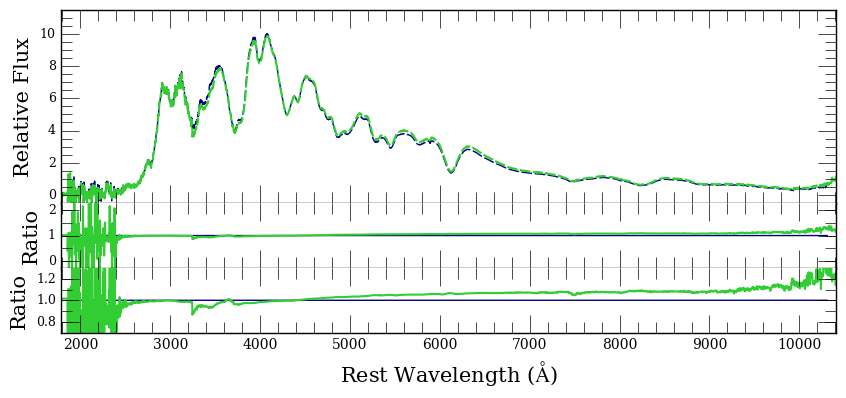

In [40]:
comparisons = []
comparisons.append(comps[0])
comparisons.append(comps_red[0])
comparisons[0].name = "Comp"
comparisons[1].name = "Comp2"
query_db.scaled_plot([comparisons[0], comparisons[1]], dashes = [8, 2])